02-regression Home Work

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
!python -m wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip


Saved under bank+marketing (2).zip


In [15]:
df = pd.read_csv('bank-full.csv', sep=';')

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome', 'y']

In [18]:
df = df[features]

In [19]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [20]:
df.y = (df['y']=='yes').astype(int)

In [21]:
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [24]:
df_train, df_val = train_test_split(df_train_full, test_size=0.2, random_state=1)

In [25]:
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5022,31,management,married,tertiary,1755,yes,unknown,21,may,588,2,-1,0,unknown,0
21256,48,blue-collar,married,unknown,434,no,cellular,18,aug,73,6,-1,0,unknown,0
40988,72,retired,married,primary,2079,no,cellular,13,aug,100,1,191,3,other,0
29315,53,technician,married,secondary,598,no,cellular,2,feb,340,3,264,2,failure,0
41401,44,admin.,married,secondary,764,yes,cellular,3,sep,232,1,213,1,failure,0


In [26]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [29]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [43]:
def train(df_train, y_train, c=1.0):
    df_train_dict = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(df_train_dict)

    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    model.fit(X_train,y_train)

    return dv, model

In [30]:
numerical = ['balance', 'day', 'duration', 'previous']
auc_score = []

for num in numerical:
    score = roc_auc_score(df.y, df[num])
    if score < 0.5:
        score = roc_auc_score(df.y, -df[num])
    auc_score.append((num,score))

In [40]:
columns = ['variables', 'auc_score']
df_auc_score = pd.DataFrame(auc_score, columns=columns)
df_auc_score

,variables,auc_score
0,balance,0.590061
1,day,0.526520
2,duration,0.807596
3,previous,0.602303


In [42]:
def predict(val, dv, model):
    val_dict = val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict_proba(X_val)[:, 1]
    y_pred = y_pred >= 0.5

    return y_pred

In [44]:
dv, model = train(df_train, y_train)

In [45]:
y_pred = predict(df_val, dv, model)

In [46]:
auc = roc_auc_score(y_val, y_pred)
round(auc,3)

0.653

In [49]:
np.arange(0, 1+0.01, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [60]:
print(len((y_val == 1)))
print(len((y_val == 0)))
print(len(y_pred))
print(len(y_val))

7234
7234
7234
7234


In [69]:
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    scores.append((t,tp, tn, fp, fn, precision, recall))
columns = ['threshold','tp', 'tn', 'fp', 'fn', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

df_scores


,threshold,tp,tn,fp,fn,precision,recall,tpr,fpr
0,0.00,913,0,6321,0,0.12621,1.000000,1.000000,1.000000
1,0.01,302,6161,160,611,0.65368,0.330778,0.330778,0.025312
2,0.02,302,6161,160,611,0.65368,0.330778,0.330778,0.025312
3,0.03,302,6161,160,611,0.65368,0.330778,0.330778,0.025312
4,0.04,302,6161,160,611,0.65368,0.330778,0.330778,0.025312
...,...,...,...,...,...,...,...,...,...
96,0.96,302,6161,160,611,0.65368,0.330778,0.330778,0.025312
97,0.97,302,6161,160,611,0.65368,0.330778,0.330778,0.025312
98,0.98,302,6161,160,611,0.65368,0.330778,0.330778,0.025312
99,0.99,302,6161,160,611,0.65368,0.330778,0.330778,0.025312


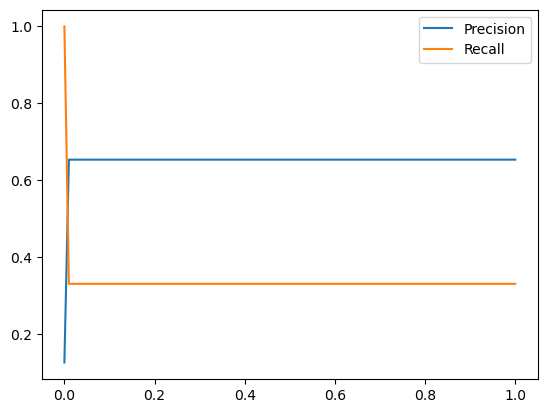

In [71]:
plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.legend()
plt.show()

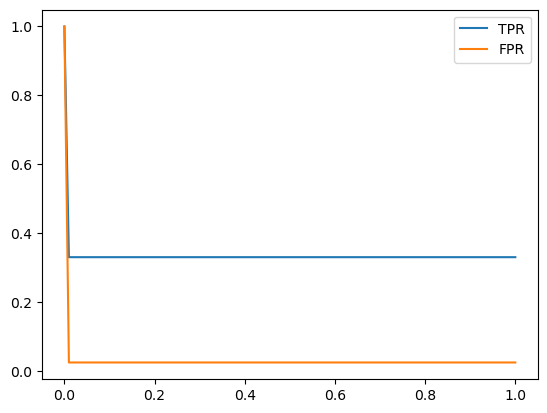

In [72]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()
plt.show()

In [73]:
df_scores['F1'] = 2*(df_scores['precision'] * df_scores['recall'])/(df_scores['precision']+df_scores['recall'])

In [74]:
df_scores['F1'].sort_values(ascending=False)

50    0.439273
64    0.439273
74    0.439273
73    0.439273
72    0.439273
        ...   
31    0.439273
30    0.439273
29    0.439273
28    0.439273
0     0.224132
Name: F1, Length: 101, dtype: float64

In [77]:
from sklearn.model_selection import KFold
 
kfold = KFold(n_splits=5, shuffle=True, random_state=1)  
scores = []
 
for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
 
    y_train = df_train.y.values
    y_val = df_val.y.values
 
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
 
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

In [79]:
np.std(scores)

0.00021340797494648516

In [81]:
for c in [0.000001, 0.001, 1]:
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)  
    scores = []
     
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]
     
        y_train = df_train.y.values
        y_val = df_val.y.values
     
        dv, model = train(df_train, y_train, c)
        y_pred = predict(df_val, dv, model)
     
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print('C=%s %.3f +- %.3f' % (c, np.mean(scores), np.std(scores)))

C=1e-06 0.536 +- 0.005
C=0.001 0.749 +- 0.009
C=1 1.000 +- 0.000
